# A/B Test

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
df = pd.read_csv('AB Test/datasets/bank-additional-full.csv', sep = ';')

In [57]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



<H3><center>Data Dictionary</center></H3>

<H5><center>The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed:</center></H5>

Original Source Data - ([source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))


|Feature|Type|Category Options|Description|
|---|---|---|---|
|**job**|*Categorical*||Type of job| 
|**marital**|*integer*||Marital status| 
|**education**|*integer*||Education level| 
|**default**|*integer*||Has credit in default|
|**balance**|*integer*||Average yearly balance (in Euros)| 
|**housing**|*integer*||Has housing loan|
|**loan**|*integer*||Has personal loan| 
|**contact**|*integer*||Contact communication type|
|**day**|*integer*||Last contact day of the month|
|**month**|*integer*||Last contact day of the year|
|**duration**|*Float*||last contact duration, in seconds (numeric)|
|**campaign**|*Float*||number of contacts performed during this campaign and for this client (numeric, includes last contact)|
|**pdays**|*Float*||number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)|
|**previous**|*Float*||number of contacts performed before this campaign and for this client (numeric)|
|**poutcome**|*Float*||outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")|
|**y**|*Float*||has the client subscribed a term deposit?|


#### For our A/B Test, we are looking at the previous and campaign categories. to test which one is better for what demographics

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [59]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## EDA

no     36548
yes     4640
Name: y, dtype: int64


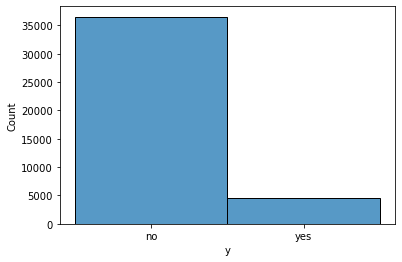

In [60]:
print(df['y'].value_counts())

sns.histplot(df['y']);